# Intro
At the end of this lesson, you will be able to use transfer learning to build highly accurate computer vision models for your custom purposes, even when you have relatively little data.

# Lesson

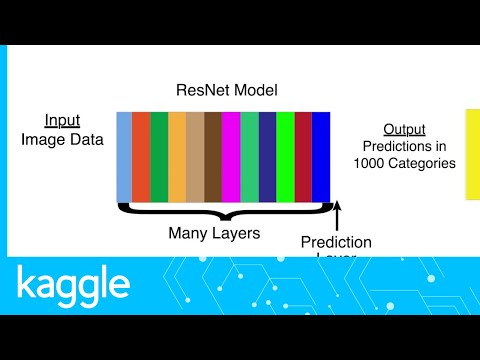

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('mPFq5KMxKVw', width=800, height=450)

# Sample Code
### Specify Model

In [3]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2
resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

ValueError: The `weights` argument should be either `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded.

### Compile Model

In [4]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Fit Model

In [5]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        '../input/urban-and-rural-photos/rural_and_urban_photos/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '../input/urban-and-rural-photos/rural_and_urban_photos/val',
        target_size=(image_size, image_size),
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        validation_data=validation_generator,
        validation_steps=1)

FileNotFoundError: [Errno 2] No such file or directory: '../input/urban-and-rural-photos/rural_and_urban_photos/train'

**Note on Results:**
The printed validation accuracy can be meaningfully better than the training accuracy at this stage. This can be puzzling at first.

It occurs because the training accuracy was calculated at multiple points as the network was improving (the numbers in the convolutions were being updated to make the model more accurate). The network was inaccurate when the model saw the first training images, since the weights hadn't been trained/improved much yet. Those first training results were averaged into the measure above.

The validation loss and accuracy measures were calculated **after** the model had gone through all the data. So the network had been fully trained when these scores were calculated.

This isn't a serious issue in practice, and we tend not to worry about it.

# Exercise Introduction

The cameraman who shot our deep learning videos mentioned a problem that we can solve with deep learning.  

He offers a service that scans photographs to store them digitally.  He uses a machine that quickly scans many photos. But depending on the orientation of the original photo, many images are digitized sideways.  He fixes these manually, looking at each photo to determine which ones to rotate.

In this exercise, you will build a model that distinguishes which photos are sideways and which are upright, so an app could automatically rotate each image if necessary.

If you were going to sell this service commercially, you might use a large dataset to train the model. But you'll have great success with even a small dataset.  You'll work with a small dataset of dog pictures, half of which are rotated sideways.

Specifying and compiling the model look the same as in the example you've seen. But you'll need to make some changes to fit the model.

## Specify the Model

Since this is your first time, we'll provide some starter code for you to modify. You will probably copy and modify code the first few times you work on your own projects.

There are some important parts left blank in the following code.

Fill in the blanks (marked with `____`) and run the cell


In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = ____
resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Indicate whether the first layer should be trained/changed or not.
my_new_model.layers[0].trainable = ____

NameError: name '____' is not defined

## Compile the Model

You now compile the model with the following line.  Run this cell.

In [2]:
my_new_model.compile(optimizer='sgd', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

NameError: name 'my_new_model' is not defined

That ran nearly instantaneously.  Deep learning models have a reputation for being computationally demanding.  Why did that run so quickly?

After thinking about this, check your answer by uncommenting the cell below.

## Review the Compile Step
You provided three arguments in the compile step.  
- optimizer
- loss
- metrics

Which arguments could affect the accuracy of the predictions that come out of the model?  After you have your answer, run the cell below to see the solution.

## Fit Model

**Your training data is in the directory `../input/dogs-gone-sideways/images/train`. The validation data is in `../input/dogs-gone-sideways/images/val`**. Use that information when setting up `train_generator` and `validation_generator`.

You have 220 images of training data and 217 of validation data.  For the training generator, we set a batch size of 10. Figure out the appropriate value of `steps_per_epoch` in your `fit_generator` call.

Fill in all the blanks (again marked as `____`).  Then run the cell of code.  Watch as your model trains the weights and the accuracy improves.

In [3]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocess_input)

train_generator = data_generator.flow_from_directory(
                                        directory=____,
                                        target_size=(image_size, image_size),
                                        batch_size=10,
                                        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
                                        directory=____,
                                        target_size=(image_size, image_size),
                                        class_mode='categorical')

# fit_stats below saves some statistics describing how model fitting went
# the key role of the following line is how it changes my_new_model by fitting to data
fit_stats = my_new_model.fit_generator(train_generator,
                                       steps_per_epoch=____,
                                       validation_data=____,
                                       validation_steps=1)

NameError: name '____' is not defined

Can you tell from the results what fraction of the time your model was correct in the validation data? 

In the next step, we'll see if we can improve on that.

## Keep Going
Move on to learn about **[data augmentation](https://www.kaggle.com/dansbecker/data-augmentation/)**.  It is a clever and easy way to improve your models. Then you'll apply data augmentation to this automatic image rotation problem.